# 1. Готовим данные

## 1.1 Импорт датасета и библиотек для преобработки

In [134]:
import pandas as pd
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
my_data = pd.read_csv('asset-v1_SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv')
display(my_data.head(30))
my_data.info()

# my_data = pd.read_csv('https://lms.skillfactory.ru/asset-v1:SkillFactory+MIPTDS+SEPT22+type@asset+block@train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.2 Принимаем решения по пропускам

In [218]:
#ранжируем столбцы по доле пропусков
cols_null_percent = my_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

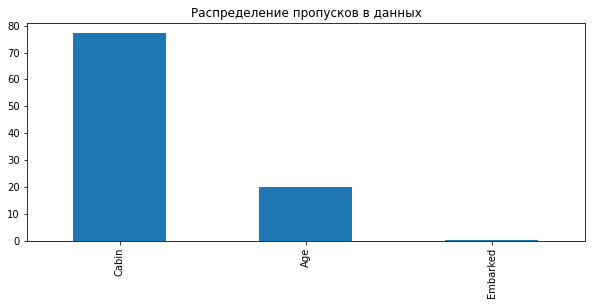

In [178]:
# визуальная оценка количества пропусков
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

Удаляем столбец Cabin, т.к. пропусков более 40%. 
Не включаем столбцы Embarked, Ticket и PassengerId как нерелевантные признаки. 
Столбец Fare по факту отражает класс, в котором ехал пассажир, поэтому его тоже не берем.

In [219]:
my_data = my_data.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)
my_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0
...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0


## 1.3 Разделим столбец Name на 2: фамилия и все остальное, чтобы отбросить имена

In [220]:
adj_data = my_data['Name'].str.split(',', expand=True)
adj_data.columns=['Surname','First_name']
adj_data


,Surname,First_name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [221]:
my_data['Name'] = adj_data['Surname']
my_data.rename(columns={'Name': 'Surname'}, inplace=True)
my_data

,Survived,Pclass,Surname,Sex,Age,SibSp,Parch
0,0,3,Braund,male,22.0,1,0
1,1,1,Cumings,female,38.0,1,0
2,1,3,Heikkinen,female,26.0,0,0
3,1,1,Futrelle,female,35.0,1,0
4,0,3,Allen,male,35.0,0,0
...,...,...,...,...,...,...,...
886,0,2,Montvila,male,27.0,0,0
887,1,1,Graham,female,19.0,0,0
888,0,3,Johnston,female,NaN,1,2
889,1,1,Behr,male,26.0,0,0


## 1.4 Приведем столбцы Surname и Sex к дискретным значениям

In [222]:
from sklearn.preprocessing import LabelEncoder
my_data['Sex'] = LabelEncoder().fit_transform(my_data['Sex'])
my_data['Surname'] = LabelEncoder().fit_transform(my_data['Surname'])
my_data

,Survived,Pclass,Surname,Sex,Age,SibSp,Parch
0,0,3,73,1,22.0,1,0
1,1,1,136,0,38.0,1,0
2,1,3,251,0,26.0,0,0
3,1,1,198,0,35.0,1,0
4,0,3,11,1,35.0,0,0
...,...,...,...,...,...,...,...
886,0,2,406,1,27.0,0,0
887,1,1,221,0,19.0,0,0
888,0,3,293,0,NaN,1,2
889,1,1,52,1,26.0,0,0


## 1.5 Преобразуем столбцы Sibsp (наличие супругов и братьев/сестер) и Parch (наличие родителей и детей) в дискретный признак 'Family', отражающий количество членов семьи

In [225]:
my_data['Family'] = my_data.Parch + my_data.SibSp
my_data = my_data.drop(['Parch', 'SibSp'], axis=1)
my_data

,Survived,Pclass,Surname,Sex,Age,Family
0,0,3,73,1,22.0,1
1,1,1,136,0,38.0,1
2,1,3,251,0,26.0,0
3,1,1,198,0,35.0,1
4,0,3,11,1,35.0,0
...,...,...,...,...,...,...
886,0,2,406,1,27.0,0
887,1,1,221,0,19.0,0
888,0,3,293,0,NaN,3
889,1,1,52,1,26.0,0


## 1.6 Удалим значения NaN в столбце Age

In [226]:
my_data = my_data.dropna(how='any', axis=0)
my_data

,Survived,Pclass,Surname,Sex,Age,Family
0,0,3,73,1,22.0,1
1,1,1,136,0,38.0,1
2,1,3,251,0,26.0,0
3,1,1,198,0,35.0,1
4,0,3,11,1,35.0,0
...,...,...,...,...,...,...
885,0,3,505,0,39.0,5
886,0,2,406,1,27.0,0
887,1,1,221,0,19.0,0
889,1,1,52,1,26.0,0


Обучаться на 2-й столбец. random state прогнал по циклу и посмотрел, где лучше работают метрики. Возраст перевел в дети(0) и взрослые(1) karpov courses -вводный урок, как уйти от категории в бинарность. 2 вариант - Cabin оставить, заполнить отдельной категорией и прогнать по моделям снова

# 2. Обучаем модели

## 2.1 Импорт данных и библиотек для моделей

In [246]:
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split

In [247]:
X = my_data[['Pclass', 'Surname', 'Sex', 'Age', 'Family']]
y = my_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)

## 2.2 Строим пайплайн

In [327]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
   
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr,
             color=np.random.rand(3,),
             label=f"{model.__name__} ROC curve (area = {auc(fpr, tpr):0.3f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.legend()

    return pipeline, model.__name__, (acc, precision, recall, f1, roc_auc)

## 2.3 Тестируем и оцениваем модели

,Accuracy,Precision,Recall,F1 score,ROC AUC
GaussianNB,0.833333,0.809524,0.772727,0.790698,0.823864
LogisticRegression,0.824074,0.765957,0.818182,0.791209,0.823153
KNeighborsClassifier,0.824074,0.820513,0.727273,0.771084,0.808949
SVC,0.814815,0.800000,0.727273,0.761905,0.801136
BernoulliNB,0.787037,0.800000,0.636364,0.708861,0.763494


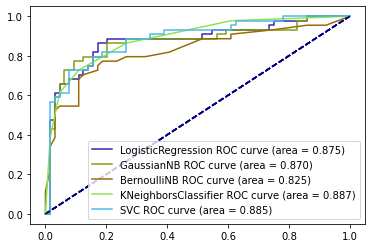

In [328]:
models = [LogisticRegression, GaussianNB, BernoulliNB, KNeighborsClassifier, SVC]
result = []
for m in models:
  if m == SVC:
    result.append(try_model(m, X_train, y_train, X_test, y_test, model_params=dict(
                kernel='linear',
                probability=True
            )))
       
  else:
    result.append(try_model(m, X_train, y_train, X_test, y_test))

(
pd.DataFrame(data=[x[2] for x in result],
  columns=['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC'],
  index=[x[1] for x in result])
  .sort_values(by='ROC AUC', ascending=False)
)



##Выводы:
Все модели, кроме BernoulliNB, показали себя хорошо. 
Наиболее плавная кривая и максимальная площадь ROC-кривой наблюдается у метода ближайших соседей.
Попробуем уменьшить размер тестовой выборки до 15% на примере KNeighborsClassifier

(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'KNeighborsClassifier',
 (0.8240740740740741,
  0.8205128205128205,
  0.7272727272727273,
  0.7710843373493976,
  0.8089488636363636))

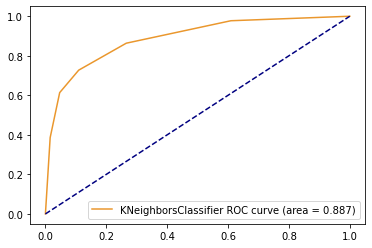

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=13)
try_model(KNeighborsClassifier, X_train, y_train, X_test, y_test)

Уменьшение размера тестовой выборки практически не повлияло на метрики модели, что говорит о достаточной обученности.

Чтобы получить более точные метрики, имеет смысл включить в датасет столбец Cabin, отброшенный нами в самом начале, и соотнести его с планом судна, переведя условные обозначения в свободу выхода на палубу (далеко от выхода или имелись препятствия (решетки и пр.)).